In [1]:
import pandas as pd
import numpy as np

In [2]:
columns = ['Architecture','Accuracy', 'Precision', 'Recall', 'F1']

results = \
[[1, 0.7986352070321536, 0.7716099959033184, 0.8575005690871842, 0.8122911051212938],
 [2, 0.5570205875549387, 0.5472473984558577, 0.7422035055770544, 0.6299874408269732],
 [3, 0.6857506361323156, 0.710711591651999, 0.6434099704074664, 0.6753882915173238],
 [4, 0.732882257691418, 0.7154824697486813, 0.7873890279990895, 0.7497155242481712],
 [5, 0.5310548230395559, 0.581155598177895, 0.27589346687912586, 0.3741606853438296],
 [6, 0.6038630580615314, 0.6051945229297979, 0.6338493057136353, 0.6191905714921059],
 [7, 0.7555517002081887, 0.7519062879876229, 0.7744138402003187, 0.7629941126997477],
 [8, 0.758443210733287, 0.7583809844152932, 0.7698611427270657, 0.7640779440835921],
 [9, 0.5080962294702752, 0.5080962294702752, 1.0, 0.6738246798067336]]

In [3]:
df = pd.DataFrame(results, columns=columns).sort_values(by=['Accuracy'], ascending=False)

In [4]:
df

,Architecture,Accuracy,Precision,Recall,F1
0,1,0.798635,0.771610,0.857501,0.812291
7,8,0.758443,0.758381,0.769861,0.764078
6,7,0.755552,0.751906,0.774414,0.762994
3,4,0.732882,0.715482,0.787389,0.749716
2,3,0.685751,0.710712,0.643410,0.675388
5,6,0.603863,0.605195,0.633849,0.619191
1,2,0.557021,0.547247,0.742204,0.629987
4,5,0.531055,0.581156,0.275893,0.374161
8,9,0.508096,0.508096,1.000000,0.673825


In [5]:
df.Architecture

0    1
7    8
6    7
3    4
2    3
5    6
1    2
4    5
8    9
Name: Architecture, dtype: int64

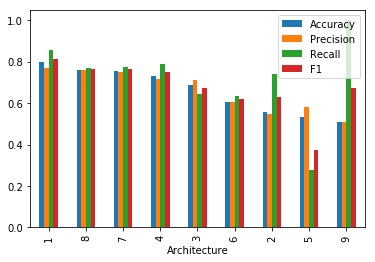

In [12]:
#df = pd.DataFrame({'speed': speed, 'lifespan': lifespan}, index=index)
df.plot.bar(x='Architecture')

In [3]:
from nltk.corpus import stopwords
import pandas as pd

english_stopwords = set(stopwords.words('english'))
categories = ['Democrat', 'Republican']
tweetsdf = pd.read_csv('democratvsrepublicantweets/ExtractedTweets.csv')
handlesdf = pd.read_csv('democratvsrepublicantweets/TwitterHandles.csv')
raw_tweets = tweetsdf['Tweet']
parties = tweetsdf['Party']

In [5]:
import re

def tokenize_tweet(s):
    s = s.lower()
    s = re.sub(r'https?://[^\s]+', '', s)
    s = re.sub(r'[^A-Za-z\s$#@0-9]+', '', s)
    s = re.sub(r'\s+', ' ', s)
    return [tok for tok in s.strip().split(' ') if tok not in english_stopwords]
    
tokenized_tweets = [tokenize_tweet(tweet) for tweet in raw_tweets]

vocab = {}
for toks in tokenized_tweets:
    for tok in toks:
        if tok in vocab:
            vocab[tok] += 1
        else:
            vocab[tok] = 1
            
vocab = {k:v for k,v in vocab.items() if v > 10}

vocabulary = list(vocab.keys())
vocabulary_size = len(vocabulary) + 1

word_to_int = {word: i + 1 for i, word in enumerate(vocabulary)}
int_to_word = {i + 1: word for i, word in enumerate(vocabulary)}

In [8]:
import numpy as np 
from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score

encoded_tweets =\
    [[word_to_int.get(tok, 0) for tok in toks if tok in word_to_int]
     for toks in tokenized_tweets]

max_tweet_len = max([len(encoded_tweet) for encoded_tweet in encoded_tweets])

X = []
for encoded_tweet in encoded_tweets:
    v = np.zeros(max_tweet_len)
    v[0:len(encoded_tweet)] = encoded_tweet
    X.append(v)
    
X = np.array(X)

y = 1.0 - np.asarray(parties == 'Democrat')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print('Max tweet length: %s' % max_tweet_len)
len(word_to_int)

Max tweet length: 28


8736

In [13]:
len(y) - sum(y)

42068.0

In [27]:
import operator
s = sorted(vocab.items(), key=operator.itemgetter(1))
s.reverse()

Text(0.5, 0.98, 'Tweet Length Frequency')

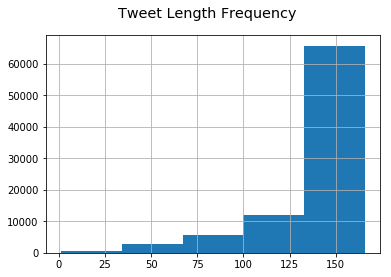

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
raw_tweets.str.len().hist(bins=5)
plt.suptitle('Tweet Length Frequency', x=0.5, ha='center', fontsize='x-large')

In [89]:
from random import shuffle 

words = []
for k, v in vocab.items():
    for i in range(v):
        words.append(k)
shuffle(words)
words = ' '.join(words)

In [90]:
words[1:10]

'roud warm'

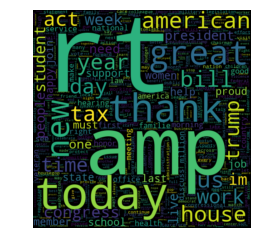

In [93]:
from wordcloud import WordCloud

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0, max_words=1000).generate(words)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()